This example notebook uses the averaging functions found ins the diff_classifier msd module to find average msd profiles over input msd datasets using precision-weighted averaging. Precision is the inverse of the standard squared error. This increases the contribution of videos that have many particles and more homogeneous datasets to the final calculated MSD.

In [13]:
import numpy as np
import diff_classifier.aws as aws
import diff_classifier.msd as msd

In [14]:
#vids = 2
to_track = []
frames = 651
fps = 100.02
umppx = 0.07

folder = 'Tissue_Studies/10_23_18_corona_tissue'
bucket = 'ccurtis.data'
types = ['PEG_cor', 'PEG', 'PS_cor', 'PS']
pups = ['P1', 'P2']
slices = ['S1', 'S2']
vids = 10

for typ in types:
    for pup in pups:
        for slic in slices:
            for num in range(1, vids+1):
                #to_track.append('100x_0_4_1_2_gel_{}_bulk_vid_{}'.format(vis, num))
                to_track.append('{}_{}_{}_XY{}'.format(typ, pup, slic, '%02d' % num))

In [8]:
len(to_track)

160

In [4]:
geomean = {}
gSEM = {}
for sample_name in to_track:
    # Users can toggle between using pre-calculated geomean files and calculating new values by commenting out the relevant
    # lines of code within the for loop.
    #aws.download_s3('{}/geomean_{}.csv'.format(folder, sample_name), 'geomean_{}.csv'.format(sample_name), bucket_name=bucket)
    #aws.download_s3('{}/geoSEM_{}.csv'.format(folder, sample_name), 'geoSEM_{}.csv'.format(sample_name), bucket_name=bucket)
    #geomean[sample_name] = np.genfromtxt('geomean_{}.csv'.format(sample_name))
    #gSEM[sample_name] = np.genfromtxt('geoSEM_{}.csv'.format(sample_name))
    
    aws.download_s3('{}/msd_{}.csv'.format(folder, sample_name), 'msd_{}.csv'.format(sample_name), bucket_name=bucket)
    geomean[sample_name], gSEM[sample_name] = msd.geomean_msdisp(sample_name, umppx=umppx, fps=fps,
                                                             remote_folder=folder, bucket=bucket)
    print('Done with {}'.format(sample_name))

Done with PEG_cor_P1_S1_XY01
Done with PEG_cor_P1_S1_XY02
Done with PEG_cor_P1_S1_XY03
Done with PEG_cor_P1_S1_XY04
Done with PEG_cor_P1_S1_XY05
Done with PEG_cor_P1_S1_XY06
Done with PEG_cor_P1_S1_XY07
Done with PEG_cor_P1_S1_XY08
Done with PEG_cor_P1_S1_XY09
Done with PEG_cor_P1_S1_XY10
Done with PEG_cor_P1_S2_XY01
Done with PEG_cor_P1_S2_XY02
Done with PEG_cor_P1_S2_XY03
Done with PEG_cor_P1_S2_XY04
Done with PEG_cor_P1_S2_XY05
Done with PEG_cor_P1_S2_XY06
Done with PEG_cor_P1_S2_XY07
Done with PEG_cor_P1_S2_XY08
Done with PEG_cor_P1_S2_XY09
Done with PEG_cor_P1_S2_XY10
Done with PEG_cor_P2_S1_XY01
Done with PEG_cor_P2_S1_XY02
Done with PEG_cor_P2_S1_XY03
Done with PEG_cor_P2_S1_XY04
Done with PEG_cor_P2_S1_XY05
Done with PEG_cor_P2_S1_XY06
Done with PEG_cor_P2_S1_XY07
Done with PEG_cor_P2_S1_XY08
Done with PEG_cor_P2_S1_XY09
Done with PEG_cor_P2_S1_XY10
Done with PEG_cor_P2_S2_XY01
Done with PEG_cor_P2_S2_XY02
Done with PEG_cor_P2_S2_XY03
Done with PEG_cor_P2_S2_XY04
Done with PEG_

In [5]:
exps = []
for typ in types:
    to_avg = []
    for sample in to_track:
        combi = '{}_P'.format(typ)
        if combi in sample:
            to_avg.append(sample)

    weights, wh1 = msd.precision_weight(to_avg, gSEM)
    geodata = msd.precision_averaging(to_avg, geomean, gSEM, weights,
                                      bucket=bucket, folder=folder, experiment=typ)
    exps.append(typ)

In [ ]:
exps = []
typ = 'COOH_serum'
to_avg = []
for sample in to_track:
    combi = '{}_X'.format(typ)
    if combi in sample and '08' not in sample:
        to_avg.append(sample)

weights, wh1 = msd.precision_weight(to_avg, gSEM)
geodata = msd.precision_averaging(to_avg, geomean, gSEM, weights,
                                  bucket=bucket, folder=folder, experiment=typ)
exps.append(typ)

In [6]:
exps = ['PS', 'PS_cor', 'PEG', 'PEG_cor']

Note that in cases where two or more averaging steps are needed (for instance, if the user takes 5 videos per well with a total of four wells), averaging steps can be performed consecutively. the msd.binning function is a helpful tool by defining bins over which to average for multi-step averaging.

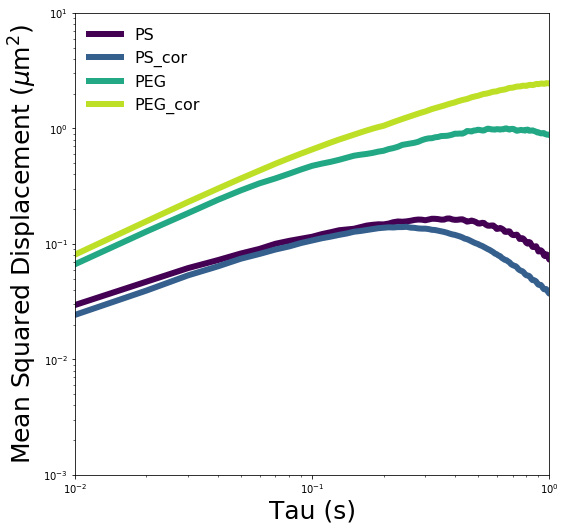

In [7]:
msd.plot_all_experiments(exps,
                         yrange=(10**-3, 10**1), bucket=bucket, folder=folder)

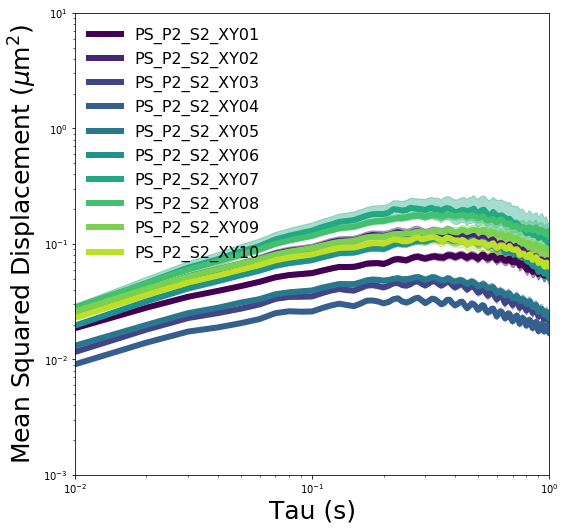

In [30]:
msd.plot_all_experiments(to_track[150:160], yrange=(10**-3, 10**1), bucket=bucket, folder=folder)

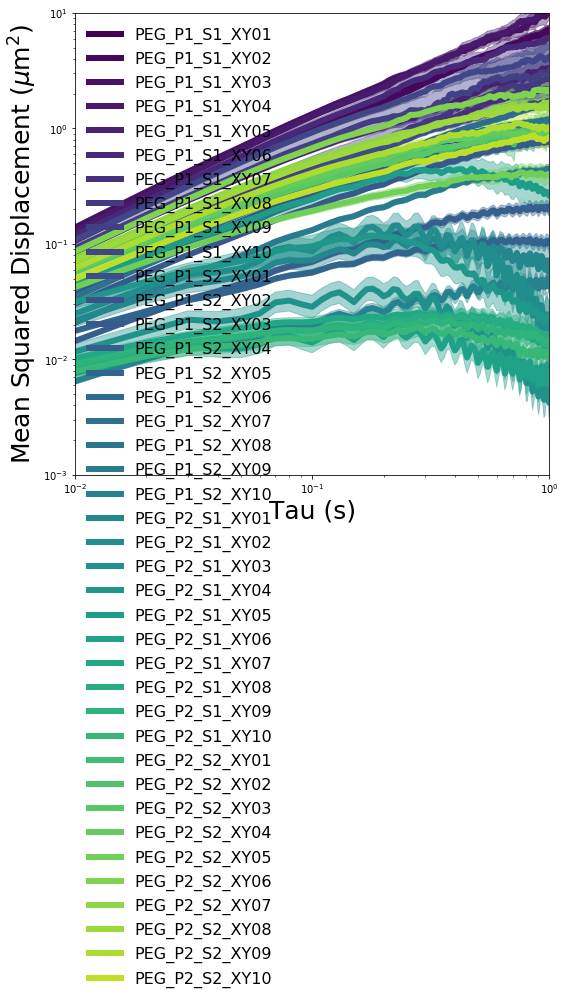

In [10]:
msd.plot_all_experiments(to_track[40:80], yrange=(10**-3, 10**1), bucket=bucket, folder=folder)

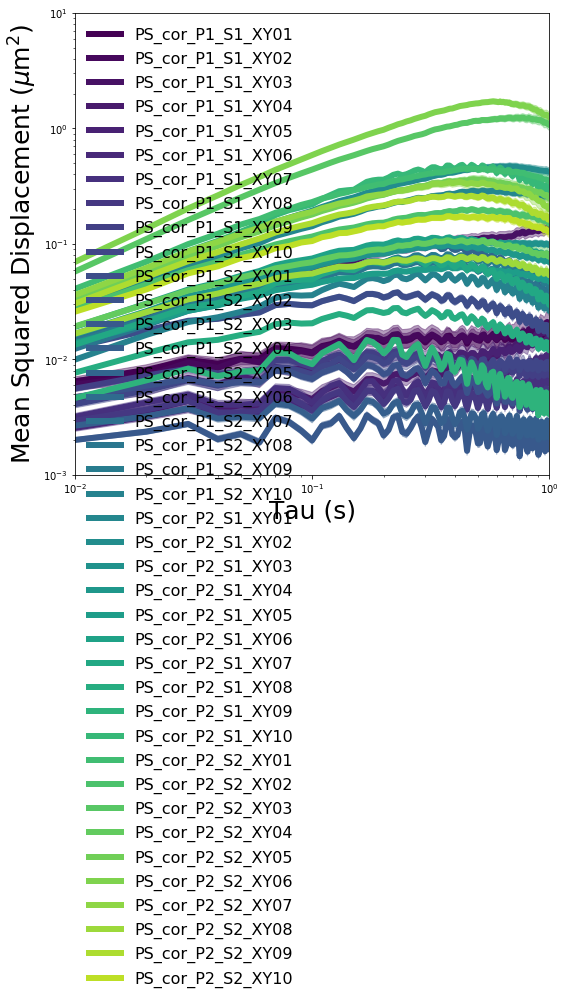

In [11]:
msd.plot_all_experiments(to_track[80:120], yrange=(10**-3, 10**1), bucket=bucket, folder=folder)

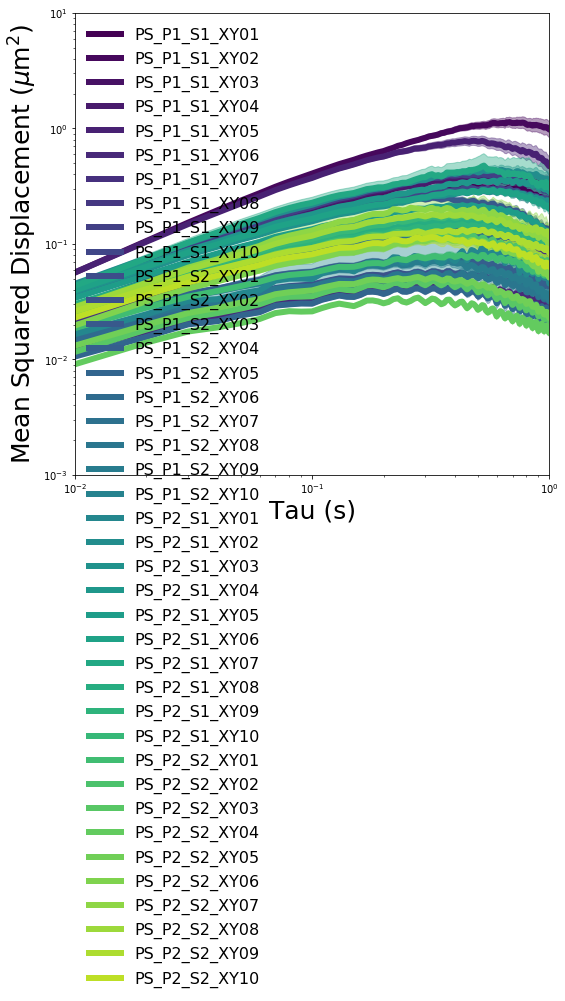

In [12]:
msd.plot_all_experiments(to_track[120:160], yrange=(10**-3, 10**1), bucket=bucket, folder=folder)